[BernoulliRBM] Iteration 1, pseudo-likelihood = -302.01, time = 0.24s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -753.25, time = 0.44s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1209.38, time = 0.42s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1638.75, time = 0.43s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2062.81, time = 0.42s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2473.02, time = 0.42s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2888.97, time = 0.43s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -3307.89, time = 0.41s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -3612.08, time = 0.42s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -4125.19, time = 0.42s
Accuracy: 0.9446318714030562


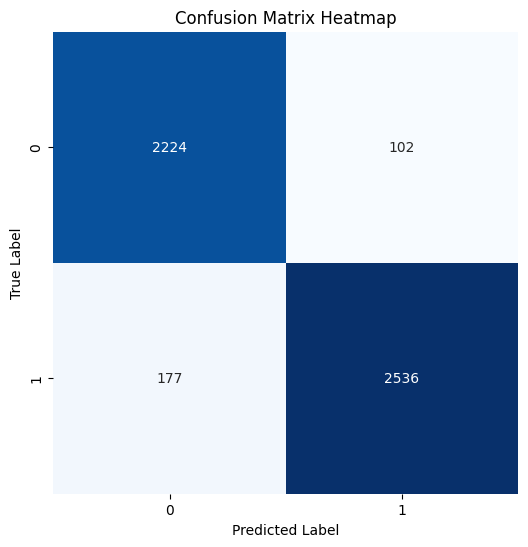

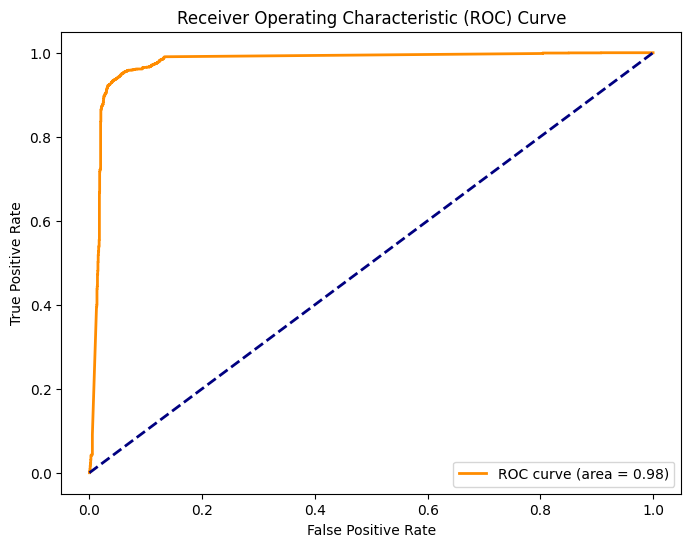

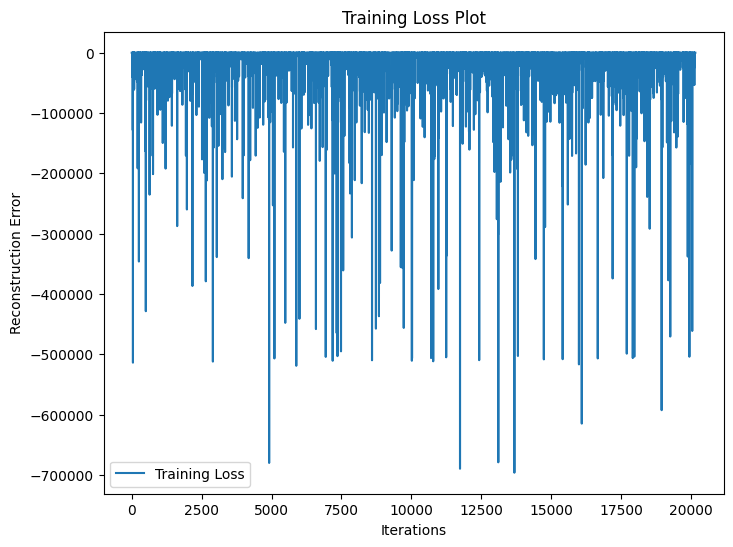


Performance Metrics:
Precision: 0.96
Recall: 0.93
F1 Score: 0.95
Specificity: 0.96
FAR: 0.04


In [6]:
import numpy as np
import pandas as pd
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load training and test data from CSV files
file_path1 = '/content/drive/MyDrive/Final year project/datafinal/train_set_after_pca.csv'
file_path2 = '/content/drive/MyDrive/Final year project/datafinal/test_set_after_pca.csv'

train_data = pd.read_csv(file_path1)
test_data = pd.read_csv(file_path2)
train_data.dropna(inplace=True)

# Separate features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Preprocess the data (Standardize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the RBM
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, verbose=1)  # Set verbose to 1 for training progress
rbm1.fit(X_train)

# Monitor reconstruction error during training
training_loss = rbm1.score_samples(X_train)

# Transform the data using the RBM
X_train_transformed = rbm1.transform(X_train)
X_test_transformed = rbm1.transform(X_test)

# Train a classifier on the RBM-transformed data (e.g., Logistic Regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = classifier.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate specificity and FAR
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]
TP = conf_mat[1, 1]

specificity = TN / (TN + FP)
far = FP / (FP + TN)

# Calculate additional performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test_transformed)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Training Loss
plt.figure(figsize=(8, 6))
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Reconstruction Error')
plt.title('Training Loss Plot')
plt.legend()
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Specificity: {:.2f}".format(specificity))
print("FAR: {:.2f}".format(far))


In [2]:
import joblib
joblib.dump(rbm, '/content/drive/My Drive/Final year project/models/rbm.keras')

NameError: ignored

In [ ]:
#rbm 2
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, verbose=0)
rbm1.fit(X_train)

# Transform the data using the RBM
X_train_transformed = rbm1.transform(X_train)
X_test_transformed = rbm1.transform(X_test)

# Train a classifier on the RBM-transformed data (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(max_iter=1000)
classifier1.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = classifier1.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.943242706886287


In [ ]:
joblib.dump(rbm1, '/content/drive/My Drive/Final year project/models/rbm1.keras')

['/content/drive/My Drive/Final year project/models/rbm1.keras']

In [ ]:
#rbm 3
rbm2 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, verbose=0)
rbm2.fit(X_train)

# Transform the data using the RBM
X_train_transformed = rbm1.transform(X_train)
X_test_transformed = rbm1.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=100, random_state=0)
classifier2.fit(X_train_transformed, y_train)


# Predict on test data
y_pred = classifier2.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9668585036713634


In [ ]:
joblib.dump(rbm2, '/content/drive/My Drive/Final year project/models/rbm2.keras')

['/content/drive/My Drive/Final year project/models/rbm2.keras']

In [ ]:
#rbm 4
rbm3 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, verbose=0)
rbm3.fit(X_train)

# Transform the data using the RBM
X_train_transformed = rbm3.transform(X_train)
X_test_transformed = rbm3.transform(X_test)

from sklearn.svm import SVC
classifier3 = SVC(kernel='linear', C=1.0, random_state=0)
classifier3.fit(X_train_transformed, y_train)



# Predict on test data
y_pred = classifier3.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9527684064298472


In [ ]:
joblib.dump(rbm3, '/content/drive/My Drive/Final year project/models/rbm3.keras')

['/content/drive/My Drive/Final year project/models/rbm3.keras']

In [ ]:
#rbm 5(svm with hyperparameter change)
rbm4 = BernoulliRBM(n_components=64, learning_rate=0.2, n_iter=10, verbose=0)
rbm4.fit(X_train)

# Transform the data using the RBM
X_train_transformed = rbm4.transform(X_train)
X_test_transformed = rbm4.transform(X_test)

from sklearn.svm import SVC
classifier4 = SVC(kernel='linear', C=1.0, random_state=0)
classifier4.fit(X_train_transformed, y_train)



# Predict on test data
y_pred = classifier4.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8719984123834094


In [ ]:
#rbm 6(xgboost)
rbm5 = BernoulliRBM(n_components=64, learning_rate=0.2, n_iter=10, verbose=0)
rbm5.fit(X_train)

# Transform the data using the RBM
X_train_transformed = rbm5.transform(X_train)
X_test_transformed = rbm5.transform(X_test)

from xgboost import XGBClassifier
classifier5 = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=0)
classifier5.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = classifier5.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9160547727723755


In [ ]:
#rbm 7(knn layers)
rbm6 = BernoulliRBM(n_components=64, learning_rate=0.2, n_iter=10, verbose=0)
rbm6.fit(X_train)

# Transform the data using the RBM
X_train_transformed = rbm6.transform(X_train)
X_test_transformed = rbm6.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier6 = KNeighborsClassifier(n_neighbors=5)
classifier6.fit(X_train_transformed, y_train)


# Predict on test data
y_pred = classifier6.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9491962691010121


In [ ]:
joblib.dump(rbm6, '/content/drive/My Drive/Final year project/models/rbm6.keras')